# Step 2: Data Cleaning

## A: Load the Necessary Libraries & Files

In [ ]:
# Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Files
customers_df = pd.read_csv('customers.csv')
geolocation_df = pd.read_csv('geolocation.csv')
order_items_df = pd.read_csv('order_items.csv')
orders_df = pd.read_csv('orders.csv')
payments_df = pd.read_csv('payments.csv')
products_df = pd.read_csv('products.csv')
sellers_df = pd.read_csv('sellers.csv')

## B: Test for Missing Data

### i. The customers table

In [5]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### ii. The geolocation table

In [6]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### iii. The order_items table


In [7]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### iv. The orders table

In [12]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
orders_df.shape

# So, it's only ~2-3% of delivered_dates that are missing data.

(99441, 8)

### v. The payments table

In [9]:
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### vi. The prouducts table

In [11]:
products_df.isnull().sum()

product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [15]:
products_df.shape

# less than 2% of data missing from category, name, description columns. 

(32951, 9)

### vii. The sellers table

In [16]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Takeaways: 
* Most tables, surprisingly, weren't missing any data
* Only the orders and products tables were missing any data at all, and then it was only ~2-3% of a handful of columns
* The columns in question may not even be relevant to the analysis (i.e. may be dropped anyways)

## C. Test for Irregular Data

### i. The customers table

In [17]:
customers_df.head(1)

# No numeric columns



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


### ii. The geolocation table

In [18]:
geolocation_df.head(1)

# No numeric data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


### iii. The order_items table

In [19]:
order_items_df.head(1)

# Could look at the price and freight_value columns

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


#### A. The price column

In [ ]:
# Get a quick idea with .describe()

order_items_df['price'].describe()

# it looks like the data may be skewed by a very high max value(s)

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

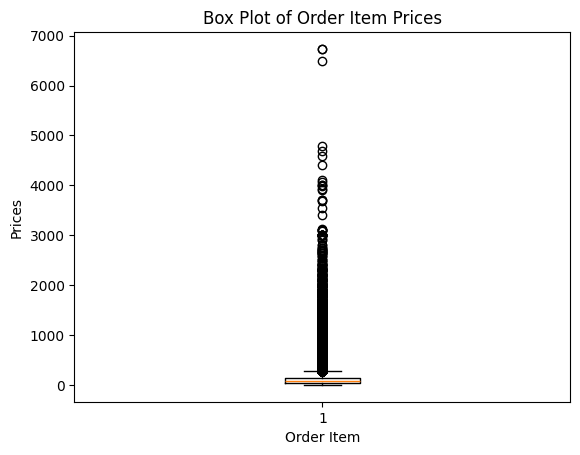

In [ ]:
# Get a better idea with a box-and-whisker plot

plt.boxplot(order_items_df['price'])
plt.title('Box Plot of Order Item Prices')
plt.xlabel('Order Item')
plt.ylabel('Prices')
plt.show()

In [24]:
# Use the IRQ to remove outliers

# Check for NAs in the 'price' column
order_items_df.isna().sum()

# Calculate IQR and bounds
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = order_items_df[(order_items_df['price'] < lower_bound) | (order_items_df['price'] > upper_bound)]

price_filtered_order_items_df = order_items_df[
    (order_items_df['price'] >= lower_bound) & 
    (order_items_df['price'] <= upper_bound)
]

# Check the result
price_filtered_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


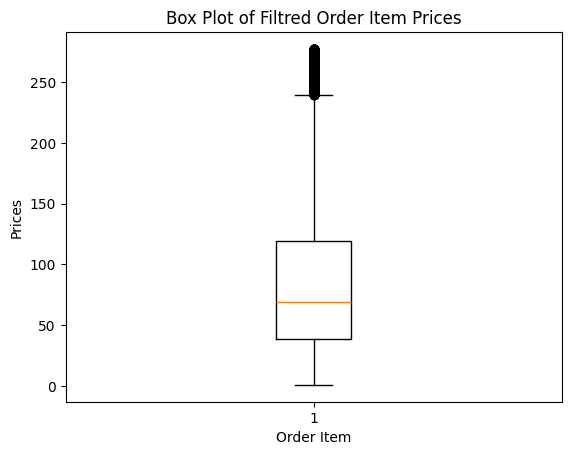

In [25]:
# Re-visualize

plt.boxplot(price_filtered_order_items_df['price'])
plt.title('Box Plot of Filtred Order Item Prices')
plt.xlabel('Order Item')
plt.ylabel('Prices')
plt.show()

In [ ]:
# .describe() the filtered 'price' column to compare to plot

price_filtered_order_items_df['price'].describe()

# Looks more reasonable 

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

#### B. The freight_value column

In [27]:
# Get a quick idea with .describe()

order_items_df['freight_value'].describe()

# it looks like the data may be skewed by a very high max value(s)

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

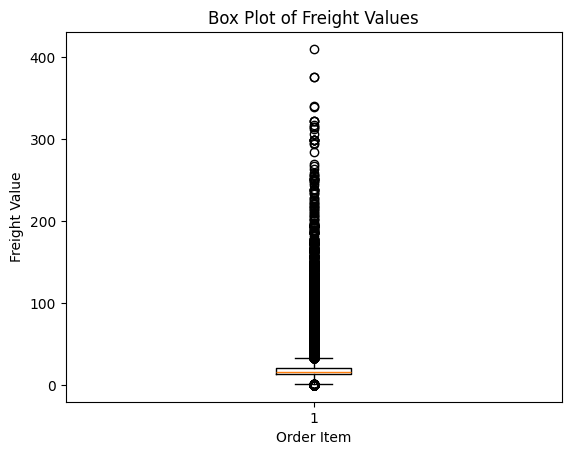

In [34]:
# Get a better idea with a box-and-whisker plot

plt.boxplot(order_items_df['freight_value'])
plt.title('Box Plot of Freight Values')
plt.xlabel('Order Item')
plt.ylabel('Freight Value')
plt.show()

In [31]:
# Use the IRQ to remove outliers

# Check for NAs in the 'freight_value' column
order_items_df.isna().sum()

# Calculate IQR and bounds
Q1 = order_items_df['freight_value'].quantile(0.25)
Q3 = order_items_df['freight_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = order_items_df[(order_items_df['freight_value'] < lower_bound) | (order_items_df['freight_value'] > upper_bound)]

freight_filtered_order_items_df = order_items_df[
    (order_items_df['freight_value'] >= lower_bound) & 
    (order_items_df['freight_value'] <= upper_bound)
]

# Check the result
freight_filtered_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


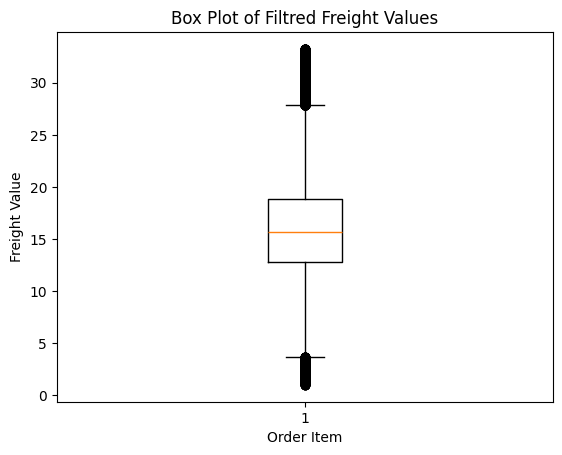

In [ ]:
# Re-visualize

plt.boxplot(freight_filtered_order_items_df['freight_value'])
plt.title('Box Plot of Filtered Freight Values')
plt.xlabel('Order Item')
plt.ylabel('Freight Value')
plt.show()

In [ ]:
# .describe() the filtered 'freight_value' column to compare to plot

freight_filtered_order_items_df['freight_value'].describe()

# Looks more reasonable 

count    100516.000000
mean         16.125685
std           5.468564
min           0.980000
25%          12.760000
50%          15.620000
75%          18.800000
max          33.250000
Name: freight_value, dtype: float64

#### Takeaways: 
* I am presently unsure whether it's better to leave 'outliers' in these two columns or not
* I do not think that these 'outliers' represent inaccurate data in the dataset
* Rather, I imagine that they are accurate prices and freight values, which just differ from the majority of the dataset
* Perhaps I will create and utilize two versions of this table - one with outliers kept in and one with outliers removed

### iv. The orders table

In [35]:
orders_df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


#### A. the order_purchase-timestamp column

In [38]:
# Get a quick idea with .describe()

orders_df['order_purchase_timestamp'].describe()

# It appears the column needs converted to datetime first

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

orders_df['order_purchase_timestamp'].describe()


count                            99441
mean     2017-12-31 08:43:12.776581120
min                2016-09-04 21:15:19
25%                2017-09-12 14:46:19
50%                2018-01-18 23:04:36
75%                2018-05-04 15:42:16
max                2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object

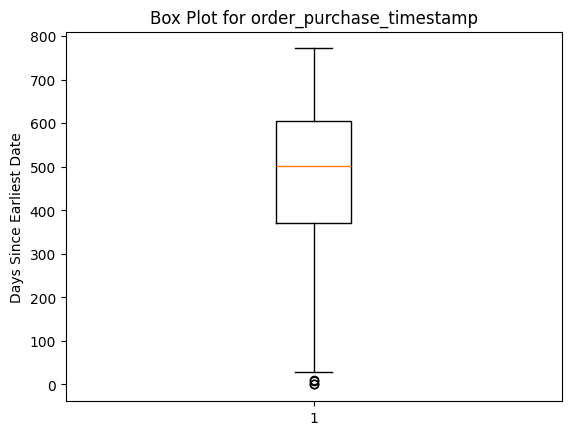

In [40]:
# Get a better idea with a box-and-whisker plot

# Convert dates to numeric values (days since the minimum date)
orders_df['order_purchase_timestamp_days'] = (orders_df['order_purchase_timestamp'] - orders_df['order_purchase_timestamp'].min()).dt.days

plt.boxplot(orders_df['order_purchase_timestamp_days'])
plt.title('Box Plot for order_purchase_timestamp')
plt.ylabel('Days Since Earliest Date')
plt.show()


### v. The payments table

In [41]:
payments_df.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


#### A. the payment_value column

In [ ]:
# Get a quick idea with .describe()

payments_df['payment_value'].describe()

# Wow, that max value looks *way* outside the norm! 

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

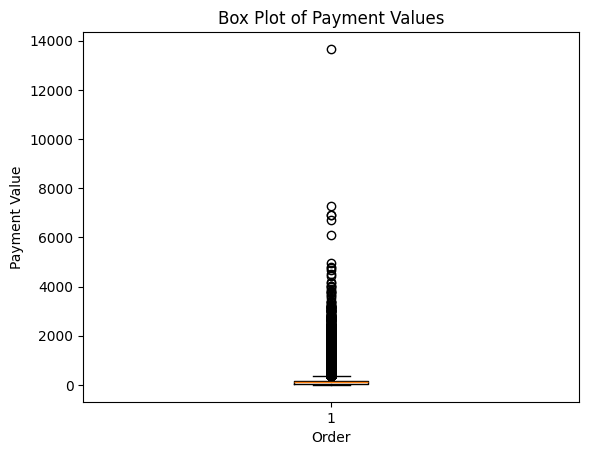

In [45]:
# Get a better idea with a box-and-whisker plot

plt.boxplot(payments_df['payment_value'])
plt.title('Box Plot of Payment Values')
plt.xlabel('Order')
plt.ylabel('Payment Value')
plt.show()

In [ ]:
# Use the IRQ to remove outliers

# Check for NAs in the 'price' column
payments_df.isna().sum()

# Calculate IQR and bounds
Q1 = payments_df['payment_value'].quantile(0.25)
Q3 = payments_df['payment_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = payments_df[(payments_df['payment_value'] < lower_bound) | (payments_df['payment_value'] > upper_bound)]

value_filtered_payments_df = payments_df[
    (payments_df['payment_value'] >= lower_bound) & 
    (payments_df['payment_value'] <= upper_bound)
]

# Check the result
value_filtered_payments_df.head() 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


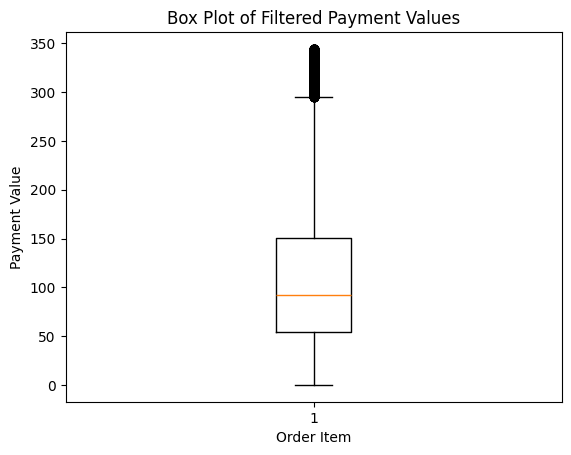

In [49]:
# Re-visualize

plt.boxplot(value_filtered_payments_df['payment_value'])
plt.title('Box Plot of Filtered Payment Values')
plt.xlabel('Order Item')
plt.ylabel('Payment Value')
plt.show()

In [55]:
# What were the actual outliers? 

outliers.shape

# 7981 rows were determined to be outliers

sorted_outliers_descending = outliers.sort_values(by='payment_value', ascending=False)

sorted_outliers_descending.head(25)

# There's a *lot* of values in the 1,000s... I don't love that these were filtered out

sorted_outliers_ascending = outliers.sort_values(by='payment_value', ascending=True)

sorted_outliers_ascending.head(25)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
76432,39b208d309c95588bf7a4ae2f20b9232,1,UPI,1,344.44
90112,ff85f6534f8a6b89e27a340dcf86ecac,1,credit_card,8,344.51
97544,1248580ae351357ac7a36fc314df5268,1,credit_card,2,344.51
65435,973f8af1ff32939821869513562a0978,1,credit_card,8,344.51
75424,b3f352a3b3887a501a98642fa5840e66,1,credit_card,4,344.53
50647,9951d6a662cb9e7b5bb442786dbf34fe,1,credit_card,7,344.55
4806,eb6fb95e3c0248ad7f1e3b668ac3f8b8,1,credit_card,4,344.55
66789,7feb0201e5b3afef04792d32b483cc17,1,credit_card,6,344.55
93471,2065ad549db75287b04797d276d50564,1,credit_card,5,344.55
25818,39c438f2a835b25cd51bbd1bed5d089e,1,credit_card,10,344.61


#### Takeaways:
* Again, I'm not sure whether filtering out the outliers actually results in a better dataset here, or not
* I don't love that it cut out everything above ~350.  There were *lots* of values there. 

### vi. The products table

In [ ]:
products_df.head(1)

# I might drop this whole table, other than the product_category column

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0


### vii. The sellers table

In [ ]:
sellers_df.head(1)

# no numerical data here

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


## D. Take Care of Unnecessary Data